In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import manifold



%matplotlib inline

In [10]:
data = datasets.fetch_openml("mnist_784", version=1, return_X_y=True)
data

In [19]:
data[0].head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data[1].head(3)

0    5
1    0
2    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [32]:
img_pixels, labels = data

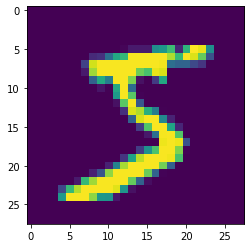

In [37]:
#plotting 1 image
first_img = img_pixels.loc[0,:].values.reshape(28,28)
plt.imshow(first_img)

In [54]:
tsne = manifold.TSNE(n_components=2,random_state=5)
tsne_transformed_data = tsne.fit_transform(img_pixels[:2000])

D:\ProgramData\Anaconda3\envs\pytorch_dl\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\ProgramData\Anaconda3\envs\pytorch_dl\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [55]:
tsne_transformed_data

array([[  2.869689 , -17.393326 ],
       [ 19.140375 , -60.779285 ],
       [ 31.984924 ,  39.148552 ],
       ...,
       [  5.8513613, -42.662777 ],
       [-17.813889 ,  -7.8561225],
       [ 15.599963 , -57.950245 ]], dtype=float32)

In [56]:
tsnedf = pd.DataFrame(np.column_stack((tsne_transformed_data,labels[:2000])),columns = ['pc1','pc2','label'])

In [57]:
tsnedf.head(5)

,pc1,pc2,label
0,2.869689,-17.393326,5
1,19.140375,-60.779285,0
2,31.984924,39.148552,4
3,-36.951351,10.619715,1
4,8.716763,33.541183,9


D:\ProgramData\Anaconda3\envs\pytorch_dl\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


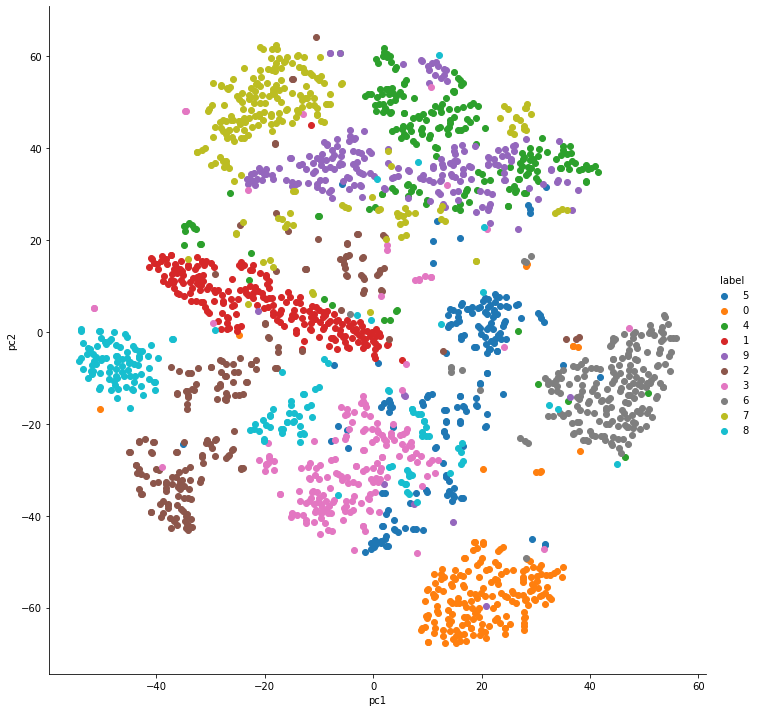

In [58]:
grid = sns.FacetGrid(tsnedf,hue="label",size=10)
grid.map(plt.scatter, "pc1", "pc2").add_legend()

[]